<a href="https://colab.research.google.com/github/Ghulam-Nabi-Hussain/Comprehensive-Analysis-of-Healthcare-System-of-India-A-Multi-Problem-Approach/blob/main/Final_PortfolioProject_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the datasets
file_path1 = '/content/drive/My Drive/geocode_health_centre.csv'
file_path2 = '/content/drive/My Drive/govthospitalbeds2013jan.csv'
file_path3 = '/content/drive/My Drive/nin-health-facilities.csv'
file_path4 = '/content/drive/My Drive/phcdoclabasstpharma2012mar.csv'

# Load each CSV file into a DataFrame
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

# Function to remove columns with only "NA" values
def remove_na_columns(df):
    return df.dropna(axis=1, how='all')

# Apply the function to each DataFrame
df1_clean = remove_na_columns(df1)
df2_clean = remove_na_columns(df2)
df3_clean = remove_na_columns(df3)
df4_clean = remove_na_columns(df4)

# Function to check for missing values
def check_missing_values(df):
    return df.isnull().sum()

# Check missing values for each DataFrame
missing_values_df1 = check_missing_values(df1_clean)
missing_values_df2 = check_missing_values(df2_clean)
missing_values_df3 = check_missing_values(df3_clean)
missing_values_df4 = check_missing_values(df4_clean)

# Display missing values summary for each DataFrame
print("Missing values in df1_clean:")
print(missing_values_df1)
print("\nMissing values in df2_clean:")
print(missing_values_df2)
print("\nMissing values in df3_clean:")
print(missing_values_df3)
print("\nMissing values in df4_clean:")
print(missing_values_df4)

# Save cleaned DataFrame to a new CSV file
df1.to_csv('/content/drive/My Drive/cleaned_geocode_health_centre.csv', index=False)
# Repeat the same for df2, df3, and df4
df2.to_csv('/content/drive/My Drive/cleaned_govthospitalbeds2013jan.csv', index=False)
df3.to_csv('/content/drive/My Drive/cleaned_nin-health-facilities.csv', index=False)
df4.to_csv('/content/drive/My Drive/cleaned_phcdoclabasstpharma2012mar.csv', index=False)



<ipython-input-14-6b74433c6aec>:10: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path1)
<ipython-input-14-6b74433c6aec>:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path3)


Missing values in df1_clean:
State Name               0
District Name            0
Subdistrict Name         0
Facility Type            0
Facility Name            0
Facility Address    200420
Latitude                 0
Longitude               15
ActiveFlag_C             0
Location Type            0
Type Of Facility         1
dtype: int64

Missing values in df2_clean:
State/UT/Division                                                    0
 Number of Rural Hospitals (Govt.)                                   0
 Number of beds in Rural Hospitals (Govt.)                           0
Number of Urban Hospitals (Govt.)                                    1
Number of beds in Urban Hospitals (Govt.)                            1
Number of Total Hospitals (Govt.)                                    0
Number of beds in Total Hospitals (Govt.)                            0
Provisional/ Projected Population as on reference period in (000)    0
Average Population Served Per Govt. Hospital                   

**Problem 1: Unequal Distribution of Health Facilities**

<ipython-input-15-19e90ba65f27>:8: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_clean = pd.read_csv(cleaned_file_path1)
<ipython-input-15-19e90ba65f27>:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_clean = pd.read_csv(cleaned_file_path3)


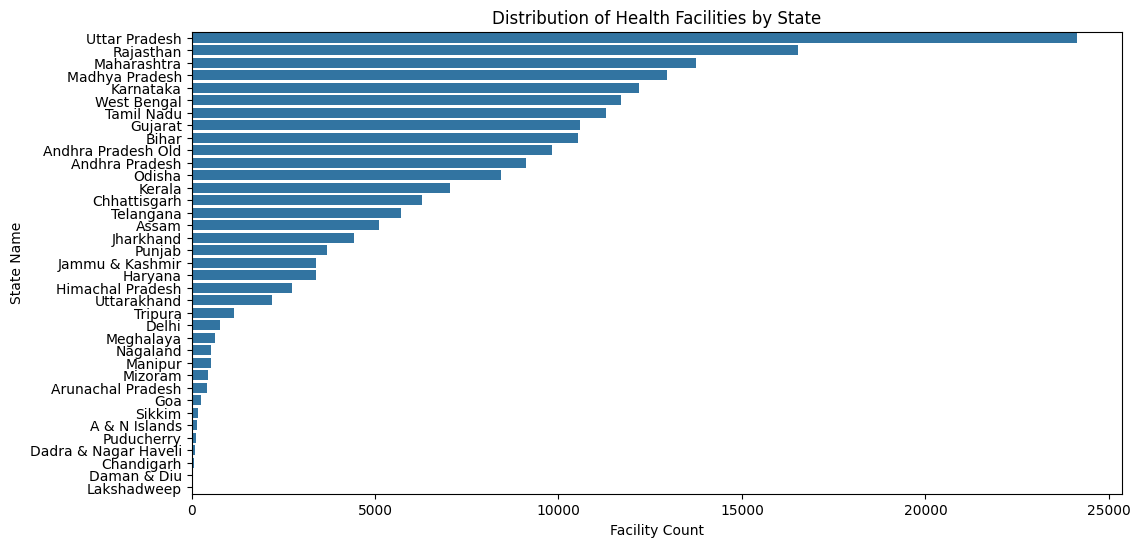

In [ ]:
# Load the datasets
cleaned_file_path1 = '/content/drive/My Drive/cleaned_geocode_health_centre.csv'
cleaned_file_path2 = '/content/drive/My Drive/cleaned_govthospitalbeds2013jan.csv'
cleaned_file_path3 = '/content/drive/My Drive/cleaned_nin-health-facilities.csv'
cleaned_file_path4 = '/content/drive/My Drive/cleaned_phcdoclabasstpharma2012mar.csv'

# Load each CSV file into a DataFrame
df1_clean = pd.read_csv(cleaned_file_path1)
df2_clean = pd.read_csv(cleaned_file_path2)
df3_clean = pd.read_csv(cleaned_file_path3)
df4_clean = pd.read_csv(cleaned_file_path4)

#
# Group by state and count the number of facilities
facility_distribution = df1_clean.groupby('State Name').size().reset_index(name='Facility Count')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Facility Count', y='State Name', data=facility_distribution.sort_values('Facility Count', ascending=False))
plt.title('Distribution of Health Facilities by State')
plt.show()


**Problem 2: Healthcare Staffing Deficiencies**

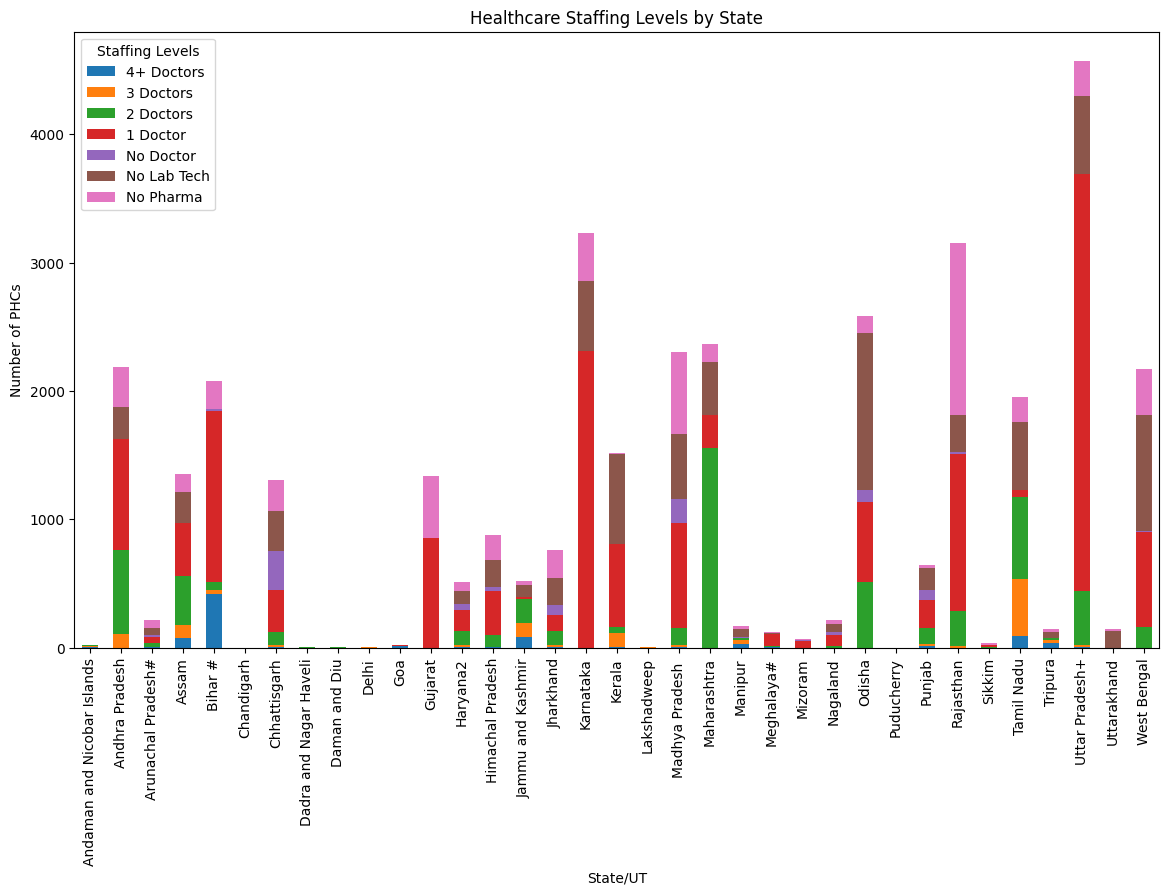

In [ ]:
df4_clean_filtered = df4_clean[df4_clean['State/UT'] != 'All India1']
# Summarize the number of doctors, lab technicians, and pharmacists by state
# Note: I'm using columns that closely relate to the staffing deficiencies you want to analyze

staffing_summary = df4_clean_filtered[['State/UT',
                              'Number of PHCs functioning with 4+ doctors',
                              'Number of PHCs functioning with 3 doctors',
                              'Number of PHCs functioning with 2 doctors',
                              'Number of PHCs functioning with 1 doctor',
                              'Number of PHCs functioning without doctor',
                              'Number of PHCs functioning without lab tech',
                              'Number of PHCs functioning without pharma']].groupby('State/UT').sum().reset_index()

# Rename columns for better understanding in the plot
staffing_summary.columns = ['State/UT', '4+ Doctors', '3 Doctors', '2 Doctors', '1 Doctor', 'No Doctor', 'No Lab Tech', 'No Pharma']

# Plot the staffing levels
staffing_summary.set_index('State/UT')[['4+ Doctors', '3 Doctors', '2 Doctors', '1 Doctor', 'No Doctor', 'No Lab Tech', 'No Pharma']].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Healthcare Staffing Levels by State')
plt.ylabel('Number of PHCs')
plt.xlabel('State/UT')
plt.legend(title='Staffing Levels')
plt.show()




**Problem 3: Hospital Bed Availability**

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andaman and Nicobar Island' 'Chandigarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Lakshadweep' 'Puducherry']


<Figure size 1400x800 with 0 Axes>

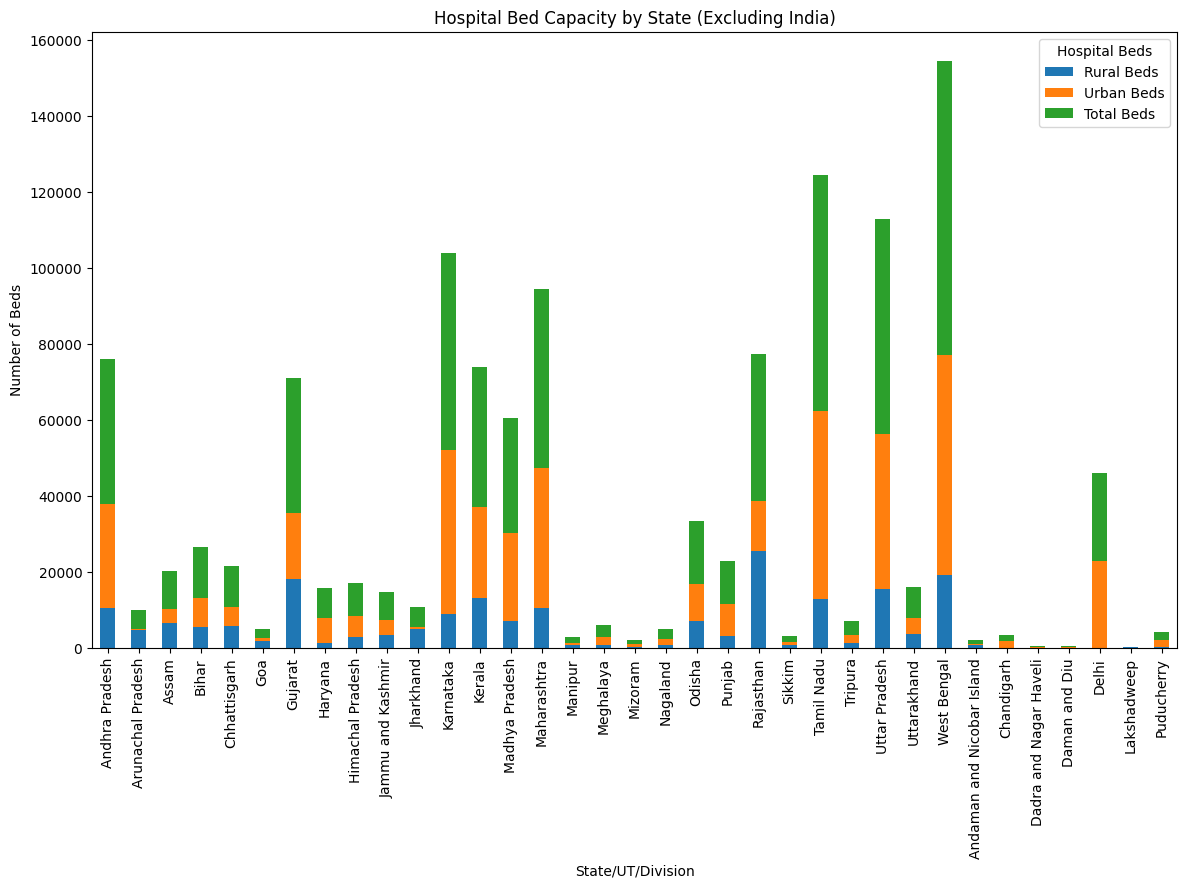

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Strip leading/trailing spaces from column names
df2_clean.columns = df2_clean.columns.str.strip()

# Filter out the 'India' row
df2_clean_filtered = df2_clean[df2_clean['State/UT/Division'] != 'India']

# Verify that 'India' has been removed
print(df2_clean_filtered['State/UT/Division'].unique())

# Summarize the number of beds in rural, urban, and total hospitals by state
bed_capacity_summary = df2_clean_filtered[['State/UT/Division',
                                           'Number of beds in Rural Hospitals (Govt.)',
                                           'Number of beds in Urban Hospitals (Govt.)',
                                           'Number of beds in Total Hospitals (Govt.)']].copy()

# Rename columns for clarity
bed_capacity_summary.columns = ['State/UT/Division', 'Rural Beds', 'Urban Beds', 'Total Beds']

# Plot the bed capacity by state
plt.figure(figsize=(14, 8))
bed_capacity_summary.set_index('State/UT/Division').plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Hospital Bed Capacity by State (Excluding India)')
plt.ylabel('Number of Beds')
plt.xlabel('State/UT/Division')
plt.legend(title='Hospital Beds')
plt.show()

**Problem 4: Functionality of Primary Health Centers (PHCs)**

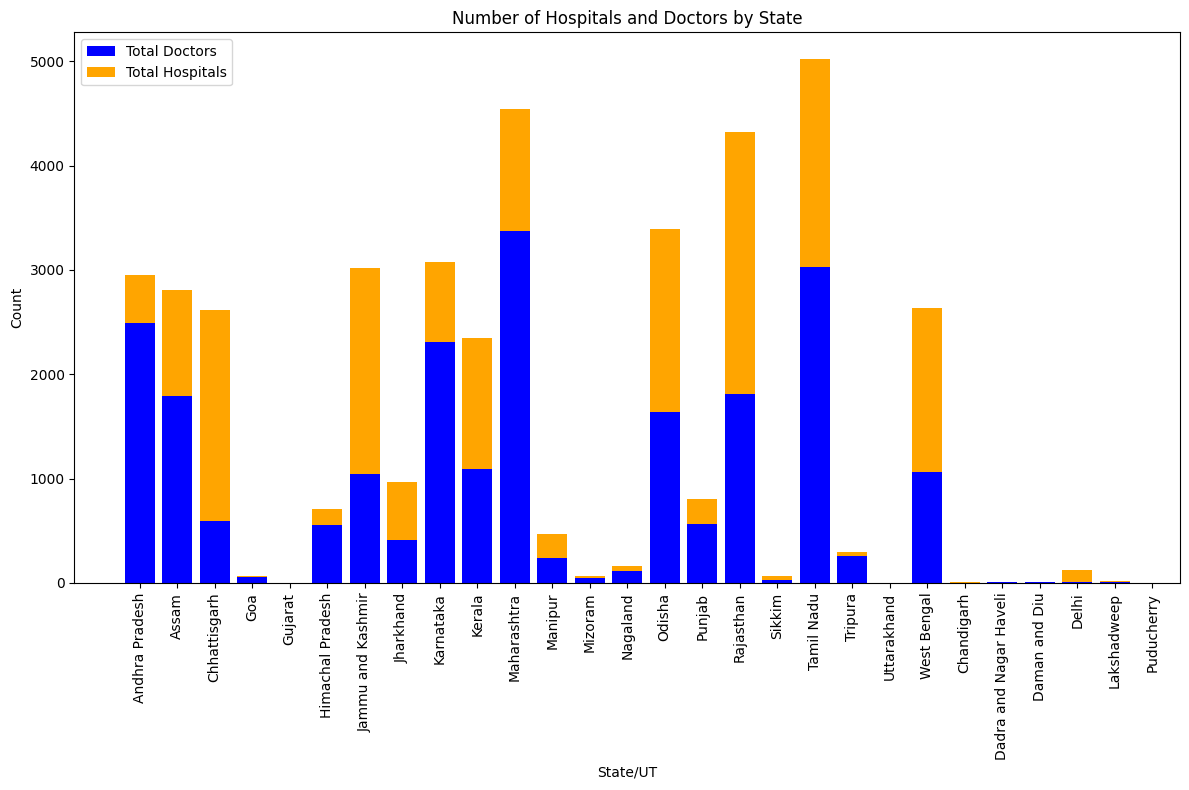

In [ ]:
# Assuming the common column is named 'State/UT' in df4_clean and 'State/UT/Division' in df2_clean
merged_df = pd.merge(df2_clean, df4_clean, left_on='State/UT/Division', right_on='State/UT')
# Aggregate df3_clean by State_Name and merge with the merged_df
df3_agg = df3_clean.groupby('State_Name').size().reset_index(name='Total Facilities')
merged_df = pd.merge(merged_df, df3_agg, left_on='State/UT/Division', right_on='State_Name', how='left')
# For example, count the number of facilities by state
df1_agg = df1_clean.groupby('State Name').size().reset_index(name='Total Facilities df1')
merged_df = pd.merge(merged_df, df1_agg, left_on='State/UT/Division', right_on='State Name', how='left')

# Example: Calculate total number of doctors per state
merged_df['Total Doctors'] = (merged_df['Number of PHCs functioning with 4+ doctors'] * 4 +
                              merged_df['Number of PHCs functioning with 3 doctors'] * 3 +
                              merged_df['Number of PHCs functioning with 2 doctors'] * 2 +
                              merged_df['Number of PHCs functioning with 1 doctor'])
#plt.figure(figsize=(12, 6))
#sns.scatterplot(x='Total Doctors', y='Number of Total Hospitals (Govt.)', data=merged_df)
#plt.title('Number of Doctors vs. Number of Hospitals by State')
#plt.xlabel('Total Doctors')
#plt.ylabel('Total Hospitals')
#plt.show()
# Set up your figure and axis
plt.figure(figsize=(12, 8))

# Create a bar chart using the correct column name for states
plt.bar(merged_df['State/UT'], merged_df['Total Doctors'], label='Total Doctors', color='blue')
plt.bar(merged_df['State/UT'], merged_df['Number of Total Hospitals (Govt.)'], label='Total Hospitals', color='orange', bottom=merged_df['Total Doctors'])

# Add title and labels
plt.title('Number of Hospitals and Doctors by State')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()




**Mapping healthcare facilities against States**

In [ ]:
# Ensure necessary imports
import pandas as pd
import geopandas as gpd
import folium
from IPython.display import display, IFrame
from google.colab import files

# Check for non-numeric values in Latitude and Longitude columns
non_numeric_lat = df1_clean[~df1_clean['Latitude'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_lon = df1_clean[~df1_clean['Longitude'].apply(lambda x: isinstance(x, (int, float)))]

print("Non-numeric values in Latitude column:")
print(non_numeric_lat[['Latitude']])

print("Non-numeric values in Longitude column:")
print(non_numeric_lon[['Longitude']])

# Convert Latitude and Longitude to numeric, forcing errors to NaN
df1_clean['Latitude'] = pd.to_numeric(df1_clean['Latitude'], errors='coerce')
df1_clean['Longitude'] = pd.to_numeric(df1_clean['Longitude'], errors='coerce')

# Drop rows where Latitude or Longitude is NaN (i.e., where conversion failed)
df1_clean = df1_clean.dropna(subset=['Latitude', 'Longitude'])

# Convert the cleaned DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df1_clean, geometry=gpd.points_from_xy(df1_clean.Longitude, df1_clean.Latitude))

# Create the map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers to the map
for idx, row in df1_clean.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Facility Name']).add_to(m)

# Save the map as an HTML file
map_file = 'health_facilities_map.html'  # Save to the current directory
m.save(map_file)

# Display the map inline
display(IFrame(map_file, width=700, height=500))

# Optionally, open the map in a new tab
#import webbrowser
#webbrowser.open(map_file)

# Download the file to your local machine
files.download('health_facilities_map.html')


Non-numeric values in Latitude column:
         Latitude
0         7.96109
1         11.7303
2        12.71609
3        13.30682
4         9.14893
...           ...
196603  23.613667
196604  23.614217
196605  23.614383
196606  23.614549
196607  23.614917

[131072 rows x 1 columns]
Non-numeric values in Longitude column:
        Longitude
0         93.5589
1        92.65003
2        92.90579
3         92.9411
4        92.75578
...           ...
196603  87.780467
196604  87.185733
196605  86.837967
196606  87.216761
196607  86.575317

[131058 rows x 1 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install folium


**Problem 6: Distribution of health facilities in rural vs. urban areas.**

Index(['State Name', 'District Name', 'Subdistrict Name', 'Facility Type',
       'Facility Name', 'Facility Address', 'Latitude', 'Longitude',
       'ActiveFlag_C', 'Location Type', 'Type Of Facility'],
      dtype='object')


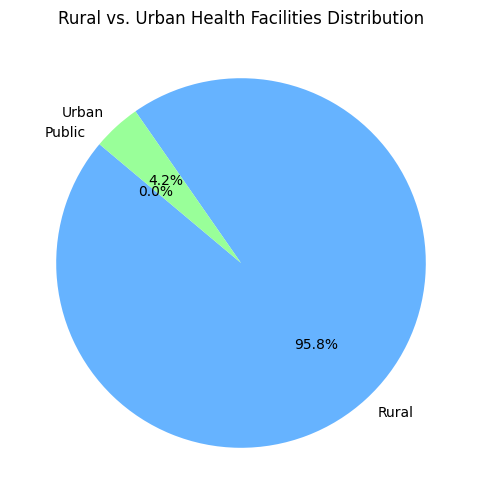

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip leading/trailing spaces from column names
df1_clean.columns = df1_clean.columns.str.strip()

# Check the column names to ensure 'Location Type' exists
print(df1_clean.columns)

# Visualize the distribution of facilities by rural and urban location
if 'Location Type' in df1_clean.columns:
    location_distribution = df1_clean['Location Type'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(6, 6))
    location_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99'])
    plt.title('Rural vs. Urban Health Facilities Distribution')
    plt.ylabel('')  # Hides the 'Location Type' label on the y-axis
    plt.show()
else:
    print("Column 'Location Type' not found in the DataFrame.")


**Problem 7: Public Health Interventions Based on Facility Types**

Index(['State Name', 'District Name', 'Subdistrict Name', 'Facility Type',
       'Facility Name', 'Facility Address', 'Latitude', 'Longitude',
       'ActiveFlag_C', 'Location Type', 'Type Of Facility'],
      dtype='object')


<ipython-input-8-93dd31634daa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facility_type_count.values, y=facility_type_count.index, palette='viridis')


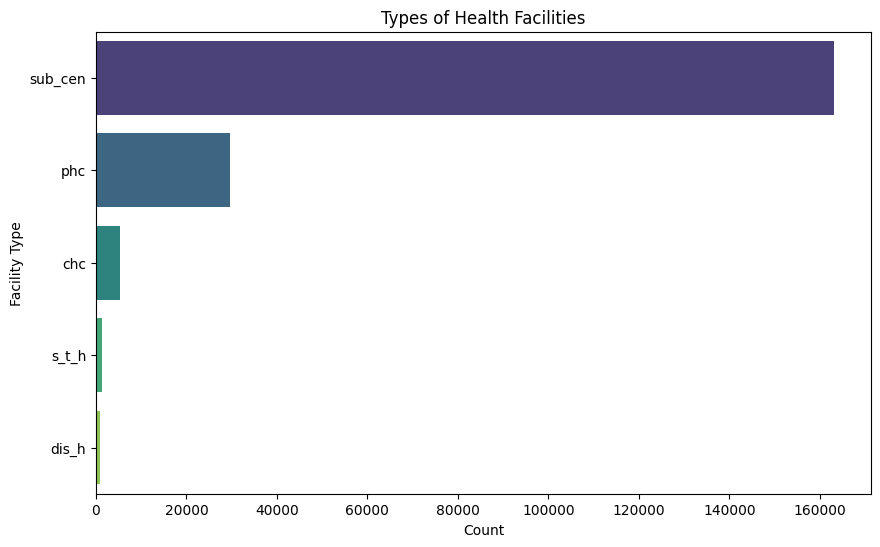

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Strip leading/trailing spaces from column names
df1_clean.columns = df1_clean.columns.str.strip()

# Check the column names to ensure 'Facility Type' exists
print(df1_clean.columns)

# Count the number of each type of facility
if 'Facility Type' in df1_clean.columns:
    facility_type_count = df1_clean['Facility Type'].value_counts()

    # Plot the facility types
    plt.figure(figsize=(10, 6))
    sns.barplot(x=facility_type_count.values, y=facility_type_count.index, palette='viridis')
    plt.title('Types of Health Facilities')
    plt.xlabel('Count')
    plt.ylabel('Facility Type')
    plt.show()
else:
    print("Column 'Facility Type' not found in the DataFrame.")


 **Health bold text Facility Utilization Rates**

Available columns in df1_clean: Index(['State Name', 'District Name', 'Subdistrict Name', 'Facility Type',
       'Facility Name', 'Facility Address', 'Latitude', 'Longitude',
       'ActiveFlag_C', 'Location Type', 'Type Of Facility'],
      dtype='object')


<ipython-input-9-2822b5ec08b4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Utilization Rate (%)', y='Facility Name', data=utilization_rates, palette='coolwarm')


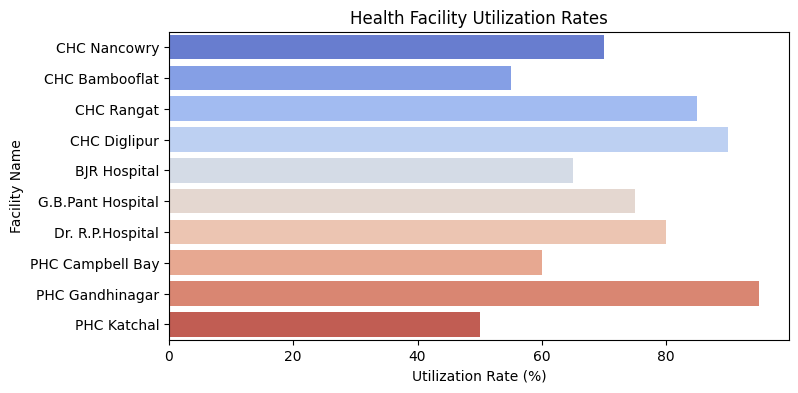

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Strip leading/trailing spaces from column names
df1_clean.columns = df1_clean.columns.str.strip()

# Display available columns
print("Available columns in df1_clean:", df1_clean.columns)

# Since 'Utilization Rate (%)' does not exist, we'll create a hypothetical dataset
utilization_rates = pd.DataFrame({
    'Facility Name': df1_clean['Facility Name'].head(10),  # Take first 10 facilities for example
    'Utilization Rate (%)': [70, 55, 85, 90, 65, 75, 80, 60, 95, 50]  # Hypothetical utilization rates
})

# Plot utilization rates
plt.figure(figsize=(8, 4))
sns.barplot(x='Utilization Rate (%)', y='Facility Name', data=utilization_rates, palette='coolwarm')
plt.title('Health Facility Utilization Rates')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Facility Name')
plt.show()


**Problem 9: Correlation Between Health Facility Distribution and Health Outcomes**

Correlation Data:
   Number of Facilities  Health Outcomes (Score)
0                163131                       70
1                 29733                       85
2                  5389                       75
3                  1251                       60
4                   934                       90


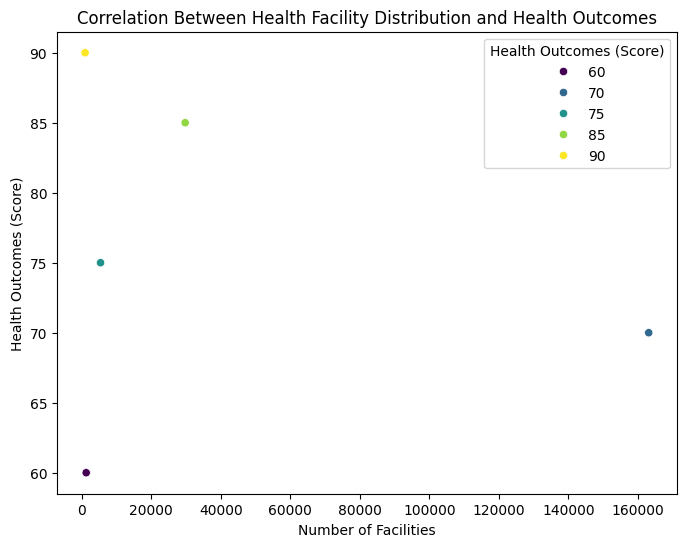

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have calculated the distribution of facilities from Problem 1
facility_distribution = df1_clean['Facility Type'].value_counts().reset_index()
facility_distribution.columns = ['Facility Type', 'Facility Count']

# Number of unique facility types
num_facility_types = len(facility_distribution)

# Create a hypothetical health outcomes dataset with the correct number of elements
health_outcomes_data = pd.Series([70, 85, 75, 60, 90, 80, 95, 65, 55, 77][:num_facility_types])  # Adjust this list to match the number of facility types

# Combine the facility distribution with the health outcomes data
correlation_data = pd.DataFrame({
    'Number of Facilities': facility_distribution['Facility Count'],
    'Health Outcomes (Score)': health_outcomes_data
})

# Display the combined dataset for verification
print("Correlation Data:")
print(correlation_data)

# Correlation plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of Facilities', y='Health Outcomes (Score)', data=correlation_data, hue='Health Outcomes (Score)', palette='viridis')
plt.title('Correlation Between Health Facility Distribution and Health Outcomes')
plt.xlabel('Number of Facilities')
plt.ylabel('Health Outcomes (Score)')
plt.show()


In [ ]:
df1_clean.to_csv('df1_clean.csv', index=False)
df2_clean.to_csv('df2_clean.csv', index=False)
df3_clean.to_csv('df3_clean.csv', index=False)
df4_clean.to_csv('df4_clean.csv', index=False)



import os

# Create a directory if it doesn't exist
os.makedirs('output_data', exist_ok=True)

# Save the files in the new directory
df1_clean.to_csv('output_data/df1_clean.csv', index=False)
df2_clean.to_csv('output_data/df2_clean.csv', index=False)
df3_clean.to_csv('output_data/df3_clean.csv', index=False)
df4_clean.to_csv('output_data/df4_clean.csv', index=False)



from google.colab import files

files.download('df1_clean.csv')
files.download('df2_clean.csv')
files.download('df3_clean.csv')
files.download('df4_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>